# Emulate using NGP interpolation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import simplest_emulator

### Specify suite of simulations to use, read P1D arxiv and setup simplest emulator

In [2]:
#basedir='../sim_suites/emulator_512_17052019/'
#p1d_label='p1d'
#skewers_label='Ns100_wM0.07'
#emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,verbose=False)
emu=simplest_emulator.SimplestEmulator(verbose=False)

### Interpolate to a particular point in parameter space

In [3]:
model={'mF':0.7,'sigT_Mpc':0.1,'gamma':1.5,'Delta2_p':0.4, 'f_p':0.98, 'n_p':-2.33, 'alpha_p':-0.21,'kF_Mpc':20.0}
nearest_model=emu.get_nearest_model(model)
print('parameter / model / nearest')
for key,value in model.items():
    print(key,value,nearest_model[key])

parameter / model / nearest
mF 0.7 0.466043140919458
sigT_Mpc 0.1 0.08778493751137739
gamma 1.5 1.4099215951469954
Delta2_p 0.4 0.23199655188525778
f_p 0.98 0.9927220108147741
n_p -2.33 -2.315000258649458
alpha_p -0.21 -0.19000003080468997
kF_Mpc 20.0 18.26496094935777


### Plot P1D when varying one of the parameters

In [4]:
# identify mean model
mean_mF=np.mean(emu.arxiv.mF)
mean_sigT_Mpc=np.mean(emu.arxiv.sigT_Mpc)
mean_gamma=np.mean(emu.arxiv.gamma)
mean_kF_Mpc=np.mean(emu.arxiv.kF_Mpc)
mean_Delta2_p=np.mean(emu.arxiv.Delta2_p)
mean_n_p=np.mean(emu.arxiv.n_p)
mean_alpha_p=np.mean(emu.arxiv.alpha_p)
mean_f_p=np.mean(emu.arxiv.f_p)
mean_model={'mF':mean_mF,'sigT_Mpc':mean_sigT_Mpc,'gamma':mean_gamma,'kF_Mpc':mean_kF_Mpc,
            'Delta2_p':mean_Delta2_p,'n_p':mean_n_p,'alpha_p':mean_alpha_p,'f_p':mean_f_p}
print('mean model =',mean_model)

mean model = {'mF': 0.62217823500356129, 'sigT_Mpc': 0.14018714633494453, 'gamma': 1.4462356585478113, 'kF_Mpc': 13.120417797800952, 'Delta2_p': 0.34965270604875698, 'n_p': -2.3000000272597205, 'alpha_p': -0.21500026352178384, 'f_p': 0.97918010110436715}


In [5]:
def plot_p1d_dependence(emu,mean_model,param,allx):

    xmin=min(allx)
    xmax=max(allx)

    # deep copy of dictionary (thread safe, why not)
    model = json.loads(json.dumps(mean_model))
    
    k_Mpc=np.logspace(-1,1,100)
    plt.figure()
    # define range of parameter values to explore    
    Nx=100
    xs=np.linspace(xmin,xmax,Nx)
    nearest_points=[]
    for i in range(Nx):
        x=xs[i]
        model[param]=x
        nearest=emu.find_nearest_model(model)
        nearest_points.append(nearest)
        p1d_Mpc = emu.emulate_p1d_Mpc(model,k_Mpc)
        col = plt.cm.jet((x-xmin)/(xmax-xmin))
        if i in [0,Nx-1]:
            label=param+' = %f'%xs[i]
        else:
            label=None
        plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)
        
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\rm 1D}(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D as a function of '+param)
        
    return nearest_points

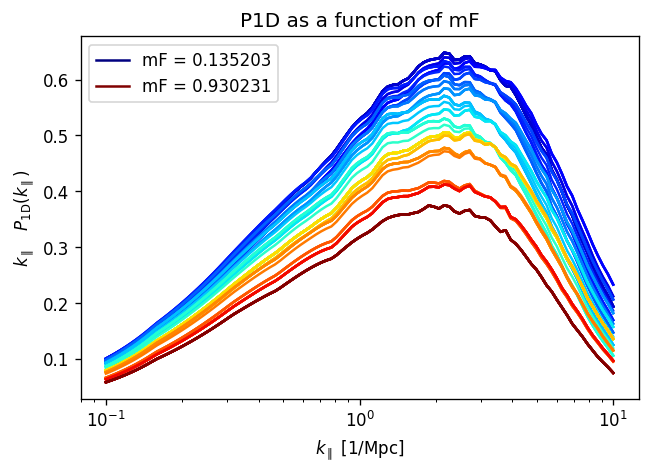

In [6]:
plot_p1d_dependence(emu,model,'mF',emu.arxiv.mF);

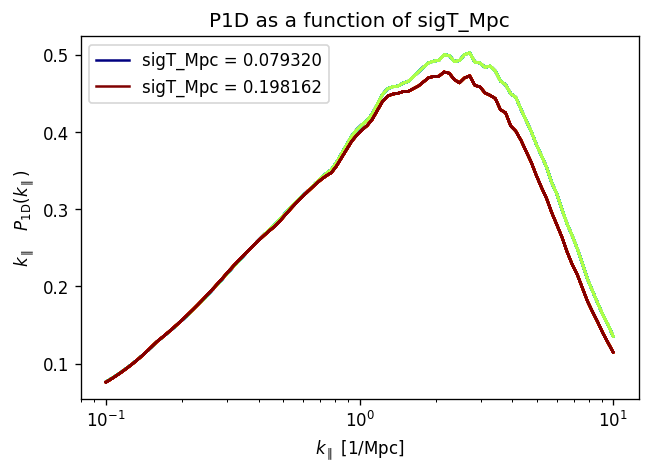

In [7]:
plot_p1d_dependence(emu,model,'sigT_Mpc',emu.arxiv.sigT_Mpc);

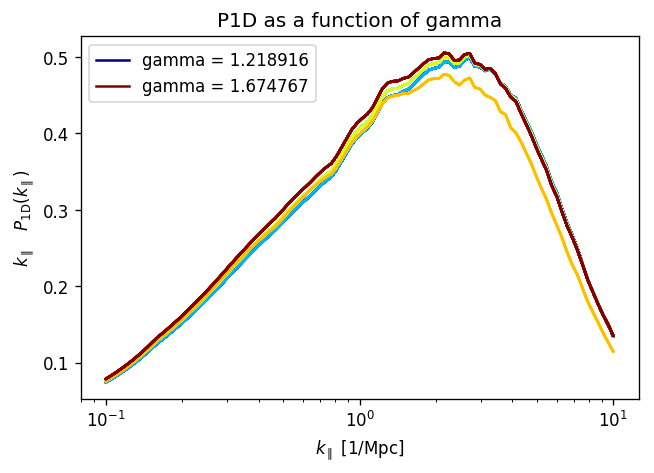

In [8]:
plot_p1d_dependence(emu,model,'gamma',emu.arxiv.gamma);

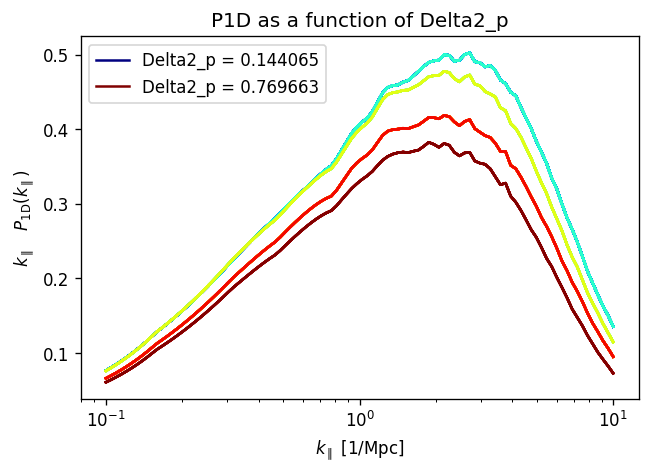

In [9]:
plot_p1d_dependence(emu,model,'Delta2_p',emu.arxiv.Delta2_p);

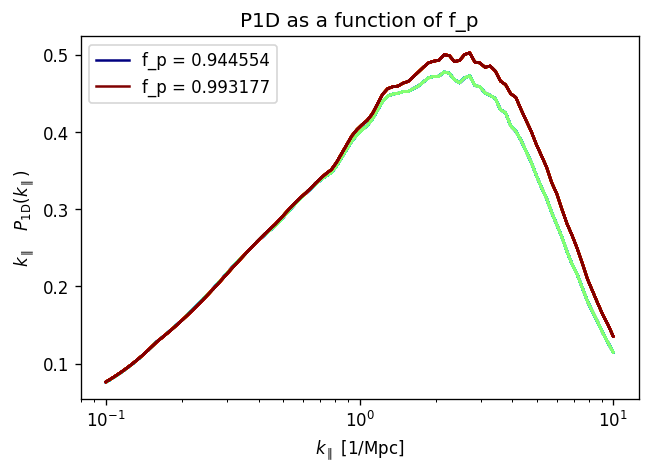

In [10]:
plot_p1d_dependence(emu,model,'f_p',emu.arxiv.f_p);

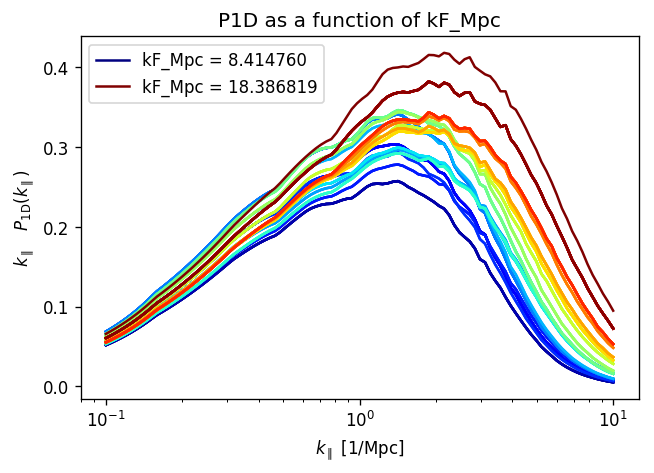

In [11]:
plot_p1d_dependence(emu,model,'kF_Mpc',emu.arxiv.kF_Mpc);

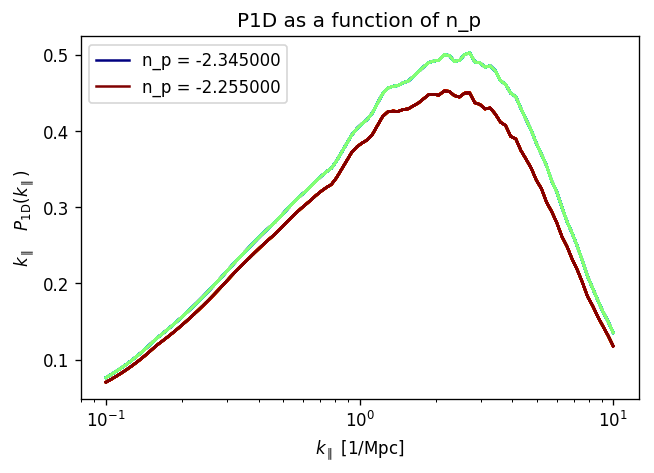

In [12]:
plot_p1d_dependence(emu,model,'n_p',emu.arxiv.n_p);

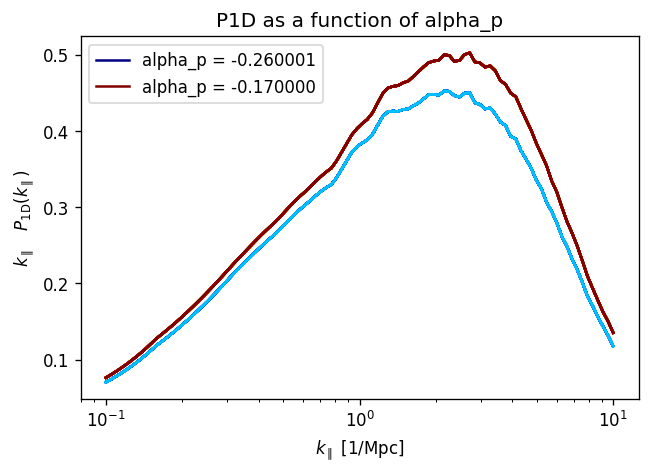

In [13]:
plot_p1d_dependence(emu,model,'alpha_p',emu.arxiv.alpha_p);